In [5]:
%run ../../utils/commonImports.py
%run ../../utils/tradingImports.py
%matplotlib inline

from base import supres
from exputils import *

# Load Data

In [6]:
# dropbox_dir = 'D:\\Dropbox\\My work\\krypl-project'
dropbox_dir = '/Users/david.vesely/Dropbox/My work/krypl-project'

In [7]:
pairs = pd.read_csv('selected-pairs.tsv', header=None)[0].tolist()
train_dict = {pair: read_train(pair, dropbox_dir) for pair in pairs}
test_dict = {pair: read_test(pair, dropbox_dir) for pair in pairs}

# Does all coins have the same sizes?

In [9]:
sizes_train = [train_dict[pair].shape[0] for pair in pairs]
sizes_test = [test_dict[pair].shape[0] for pair in pairs]

In [11]:
list(zip(sizes_train, sizes_test))

[(35088, 21840),
 (35088, 21840),
 (35088, 21840),
 (35088, 21840),
 (35088, 21840),
 (35088, 21840),
 (35088, 21840),
 (35088, 21840),
 (35088, 21840),
 (35088, 21840),
 (35088, 21840),
 (35088, 21840),
 (35088, 21840),
 (35088, 21840),
 (35088, 21840),
 (35088, 21840),
 (35088, 21840),
 (35087, 21840),
 (35088, 21840)]

# Missing and duplicate candles

Should be only for pairs[-2] train_data

In [13]:
def dates_l(start, end, delta):
    size = int((end - start) / delta) + 1
    deltas = pd.Series([delta]*size)
    dates = deltas.cumsum() + start - delta
    return dates.apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))

In [16]:
from datetime import timedelta  


def test_pairs(data_dict):
    for pair in pairs:
        data = data_dict[pair]
        min_date = str_time_to_datetime(data['date'].min())
        max_date = str_time_to_datetime(data['date'].max())

        dates = set(dates_l(min_date, max_date, timedelta(minutes=30)))
        data_dates = set(data['date'])

        missing = list(dates - data_dates)
        date_counts = data['date'].value_counts()
        duplicates = list(date_counts[date_counts > 1].index)

        data_dates = data['date'].tolist()
        is_sorted = all(data_dates[i] <= data_dates[i + 1] for i in range(len(data)-1))

        print(f"---- {pair} ----")
        print(f"{min_date}  -  {max_date} ")
        if len(missing) > 0 or not is_sorted or len(duplicates) > 0:
            print("missing: ", ','.join(missing))
            print("duplicates: ", ','.join(duplicates))
            print("sorted: ", is_sorted)
        else:
            print('OK')

        print("")

In [17]:
test_pairs(train_dict)

---- BTC_ETH ----
2016-01-01 00:00:00  -  2017-12-31 23:30:00 
OK

---- BTC_XRP ----
2016-01-01 00:00:00  -  2017-12-31 23:30:00 
OK

---- BTC_LTC ----
2016-01-01 00:00:00  -  2017-12-31 23:30:00 
OK

---- BTC_XMR ----
2016-01-01 00:00:00  -  2017-12-31 23:30:00 
OK

---- BTC_STR ----
2016-01-01 00:00:00  -  2017-12-31 23:30:00 
OK

---- BTC_DASH ----
2016-01-01 00:00:00  -  2017-12-31 23:30:00 
OK

---- BTC_BTS ----
2016-01-01 00:00:00  -  2017-12-31 23:30:00 
OK

---- BTC_FCT ----
2016-01-01 00:00:00  -  2017-12-31 23:30:00 
OK

---- BTC_XEM ----
2016-01-01 00:00:00  -  2017-12-31 23:30:00 
OK

---- BTC_MAID ----
2016-01-01 00:00:00  -  2017-12-31 23:30:00 
OK

---- BTC_NXT ----
2016-01-01 00:00:00  -  2017-12-31 23:30:00 
OK

---- BTC_SYS ----
2016-01-01 00:00:00  -  2017-12-31 23:30:00 
OK

---- BTC_GAME ----
2016-01-01 00:00:00  -  2017-12-31 23:30:00 
OK

---- BTC_CLAM ----
2016-01-01 00:00:00  -  2017-12-31 23:30:00 
OK

---- BTC_VTC ----
2016-01-01 00:00:00  -  2017-12-31 23:30

In [18]:
test_pairs(test_dict)

---- BTC_ETH ----
2018-01-01 00:00:00  -  2019-03-31 23:30:00 
OK

---- BTC_XRP ----
2018-01-01 00:00:00  -  2019-03-31 23:30:00 
OK

---- BTC_LTC ----
2018-01-01 00:00:00  -  2019-03-31 23:30:00 
OK

---- BTC_XMR ----
2018-01-01 00:00:00  -  2019-03-31 23:30:00 
OK

---- BTC_STR ----
2018-01-01 00:00:00  -  2019-03-31 23:30:00 
OK

---- BTC_DASH ----
2018-01-01 00:00:00  -  2019-03-31 23:30:00 
OK

---- BTC_BTS ----
2018-01-01 00:00:00  -  2019-03-31 23:30:00 
OK

---- BTC_FCT ----
2018-01-01 00:00:00  -  2019-03-31 23:30:00 
OK

---- BTC_XEM ----
2018-01-01 00:00:00  -  2019-03-31 23:30:00 
OK

---- BTC_MAID ----
2018-01-01 00:00:00  -  2019-03-31 23:30:00 
OK

---- BTC_NXT ----
2018-01-01 00:00:00  -  2019-03-31 23:30:00 
OK

---- BTC_SYS ----
2018-01-01 00:00:00  -  2019-03-31 23:30:00 
OK

---- BTC_GAME ----
2018-01-01 00:00:00  -  2019-03-31 23:30:00 
OK

---- BTC_CLAM ----
2018-01-01 00:00:00  -  2019-03-31 23:30:00 
OK

---- BTC_VTC ----
2018-01-01 00:00:00  -  2019-03-31 23:30

# Look at BTC_VIA hole

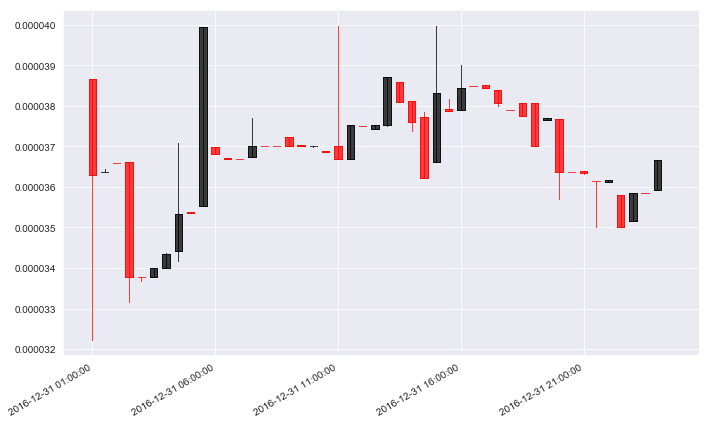

In [22]:
via = train_dict['BTC_VIA']

plot_candles(via.query('date >= "2016-12-31" and date < "2017-01-01"'));

# Conclusion

Data jsou v poradku, jedina chybejici svicka nebude mit vliv na performance modelu.